In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [14]:
img = cv2.imread('P_00004.png')

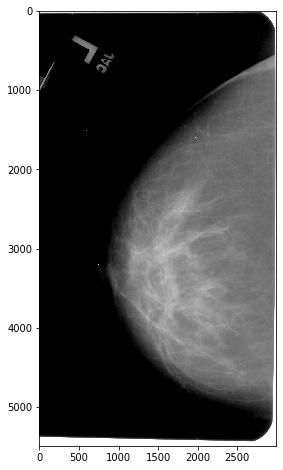

In [15]:
  # lower and upper bounds ---> < lower bound = not an edge, > upper bound = edge
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

In [16]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.equalizeHist(img)
img = cv2.medianBlur(img,9) 

img1_sobelx1 = cv2.Sobel(img,cv2.CV_16S,1,0,ksize=3)  # x - horizontal
img1_sobelx1_16S = np.absolute(img1_sobelx1)
img1_sobelx1_8U = np.uint8(img1_sobelx1_16S)


img1_sobely1 = cv2.Sobel(img,cv2.CV_16S,0,1,ksize=3)  # y - vertical
img1_sobely1_16S = np.absolute(img1_sobely1)
img1_sobely1_8U = np.uint8(img1_sobely1_16S)

img1_sobel_xy1 = np.sqrt(img1_sobely1**2 + img1_sobelx1**2)

img1_sobell_xy1 = np.uint8(img1_sobel_xy1)
img1_Cannyy = cv2.Canny(img1_sobell_xy1,20,75)  # lower and upper bounds ---> < lower bound = not an edge, > upper bound = edge





C:\Users\Adithya\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


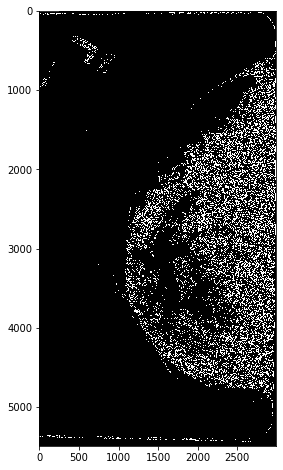

In [17]:
  # lower and upper bounds ---> < lower bound = not an edge, > upper bound = edge
plt.figure(figsize=(12,8))
plt.imshow(img1_Cannyy,cmap='gray')

In [ ]:
import pandas as pd
#img = cv2.imread('BSE_Image.jpg')
img = img1_Cannyy
#Here, if you have multichannel image then extract the right channel instead of converting the image to grey. 
#For example, if DAPI contains nuclei information, extract the DAPI channel image first. 

#Multiple images can be used for training. For that, you need to concatenate the data

#Save original image pixels into a data frame. This is our Feature #1.
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

#Generate Gabor features
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []  #Create empty list to hold all kernels that we will generate in a loop
for theta in range(8):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
    theta = theta / 4. * np.pi
    for sigma in (1, 3, 5, 7):  #Sigma with values of 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                           
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=5  #Try 15 for hidden image. Or 9 for others
                phi = 0  #0.8 for hidden image. Otherwise leave it to 0
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)  
                print(img.shape)
                filtered_img = fimg.reshape(-1)
                print(img.shape)
                
                cv2.imwrite('C:/Users/Adithya/Desktop/research/gabor_img/'+gabor_label+'.jpg', filtered_img.reshape(img.shape))

                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                
                num += 1  #Increment for gabor column label
                if(num==200):
                    break;
            
                
print(df.head())

#df.to_csv("Gabor.csv")

(5491, 2986)
(5491, 2986)
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
(5491, 2986)
(5491, 2986)
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
(5491, 2986)
(5491, 2986)
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
(5491, 2986)
(5491, 2986)
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
(5491, 2986)
(5491, 2986)
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
(5491, 2986)
(5491, 2986)
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
(5491, 2986)
(5491, 2986)
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
(5491, 2986)
(5491, 2986)
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
(5491, 2986)
(5491, 2986)
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
(5491, 2986)
(5491, 2986)
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
(5491, 2986)
(5491, 2986)
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981

In [1]:
# Comparing PSNR values of the various outputs

from math import log10, sqrt


  
def PSNR(original, laplacian):
    mse1 = np.mean((original - laplacian) ** 2)
    if(mse1 == 0):  # MSE is zero means no noise is present in the signal 
                  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse1))
    return psnr

def PSNR(original, canny_and_sobel):
    mse2 = np.mean((original - canny_and_sobel) ** 2)
    if(mse2 == 0):  # MSE is zero means no noise is present in the signal 
                  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse2))
    return psnr

def PSNR(original, canny):
    mse3 = np.mean((original - canny) ** 2)
    if(mse3 == 0):  # MSE is zero means no noise is present in the signal 
                  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse3))
    return psnr
  
def main():
     original = img1_gray
     laplacian = img1_Lap2
     value1 = PSNR(original, laplacian)
     canny_and_sobel = img1_Cannyy
     value2 = PSNR(original, canny_and_sobel)
     canny = img1_Canny1
     value3 = PSNR(original, canny)
     print(f"PSNR value of Laplacian is {value1} dB")
     
     print(f"PSNR value is {value2} dB")
     
     print(f"PSNR value is {value3} dB")  
    
if __name__ == "__main__":
    main()